<a href="https://colab.research.google.com/github/jfgf11/Examen-2-Machine/blob/master/examen2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Examen 2




In [0]:
!pip install pyEDFlib

7
7950000


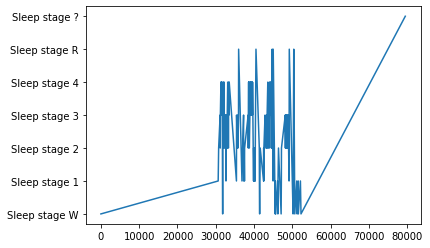

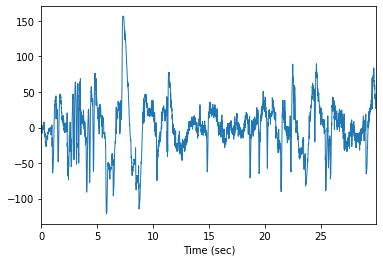

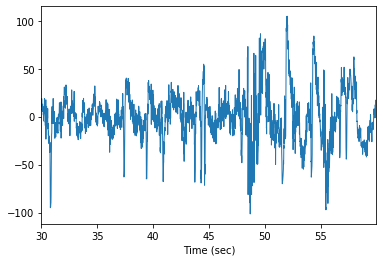

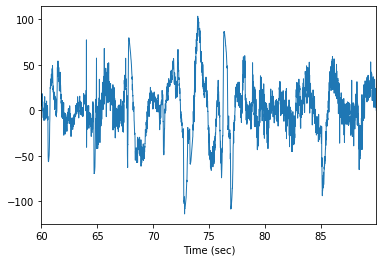

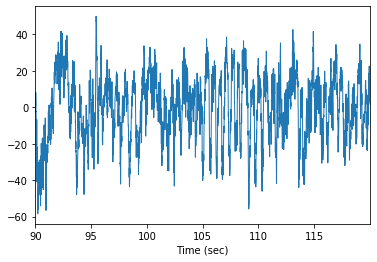

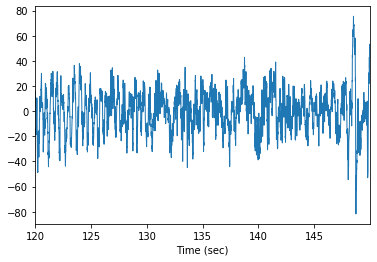

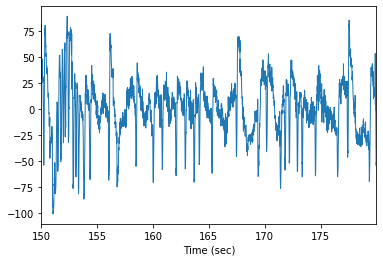

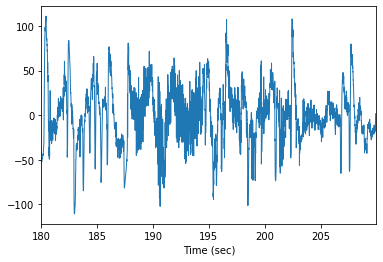

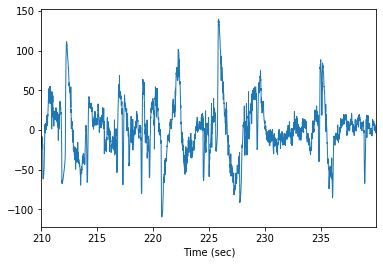

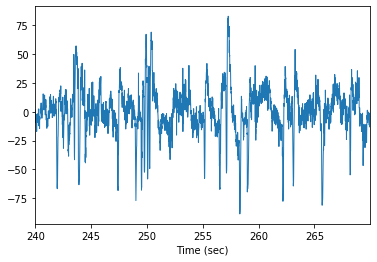

KeyboardInterrupt: ignored

In [0]:

import pyedflib as pyedf
import numpy as np
import matplotlib.pyplot as ptl


# Lectura del archivo de estados de sueño (etiquetas)
st_FileHypEdf = pyedf.EdfReader("SC4001EC-Hypnogram.edf")
print(st_FileHypEdf)

# Datos en ventanas de 30 segundos, 
#v_HypTime es el tiempo de inicio, v_HypDur es la duración en un estado específico (pueden ser varias ventanas),
# v_Hyp es la etiqueta.

v_HypTime, v_HypDur, v_Hyp = st_FileHypEdf.readAnnotations()

ptl.figure()
ptl.plot(v_HypTime, v_Hyp)

# Lectura de las señales s_SigNum señales con nombres v_Signal_Labels
st_FileEdf = pyedf.EdfReader("SC4001E0-PSG.edf")
print(st_FileEdf)
s_SigNum = st_FileEdf.signals_in_file
print(s_SigNum)
v_Signal_Labels = st_FileEdf.getSignalLabels()


# Conversion a segundos usando frecuencia de muestreo.
s_SigRef = 0
s_NSamples = st_FileEdf.getNSamples()[0]
s_FsHz = st_FileEdf.getSampleFrequency(s_SigRef)
print(s_NSamples)

# v_Sig = np.zeros((s_NSamples, 1))
v_Sig = st_FileEdf.readSignal(s_SigRef)
v_Time = np.arange(0, s_NSamples) / s_FsHz

s_WinSizeSec = 30
s_WinSizeSam = np.round(s_FsHz * s_WinSizeSec)


# plot de señales en ventanas de 30s
s_FirstInd = 0
ptl.figure()
while 1:
    s_LastInd = s_FirstInd + s_WinSizeSam
    if s_LastInd > s_NSamples:
        break

    ptl.plot(v_Time[s_FirstInd:s_LastInd], v_Sig[s_FirstInd:s_LastInd], linewidth=1)
    ptl.xlabel('Time (sec)')
    ptl.xlim(v_Time[s_FirstInd], v_Time[s_LastInd - 1])
    ptl.pause(0.5)

    s_FirstInd = s_LastInd

ptl.show()

In [0]:
print(st_FileHypEdf)
print(s_SigNum)


7


In [0]:
print(v_HypTime[0:5])
print(v_Hyp[0:5])

[    0. 30630. 30750. 31140. 31170.]
['Sleep stage W' 'Sleep stage 1' 'Sleep stage 2' 'Sleep stage 3'
 'Sleep stage 2']


In [0]:
79500/30*153

405450.0

In [0]:
30*100

3000